In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib widget
plt.style.use('seaborn')

Read out all pixel values for both samples: Sample 2 (s2) and sample 4 (s4)

In [2]:
arr_s2 = np.genfromtxt(r'C:\Users\swies\polybox\Network_Drive\Projects\RLM\RLM_November21\Images_for_pres\Movie_796-lum_20s_gain150.txt', delimiter='\t').flatten()
arr_s4 = np.genfromtxt(r'C:\Users\swies\polybox\Network_Drive\Projects\RLM\RLM_November21\Images_for_pres\Movie_803-lum_20s_gain150.txt', delimiter='\t').flatten()

Convert sample arrays to dataframe and provide summary

In [3]:
df_s2 = pd.DataFrame(data={'pixel_value':arr_s2,'sample':2})
df_s2.describe()

,pixel_value,sample
count,262144.000000,262144.0
mean,2018.956326,2.0
std,175.875081,0.0
min,1885.000000,2.0
25%,1936.000000,2.0
50%,1989.000000,2.0
75%,2068.000000,2.0
max,61999.000000,2.0


In [4]:
df_s4 = pd.DataFrame(data={'pixel_value':arr_s4,'sample':4})
df_s4.describe()

,pixel_value,sample
count,262144.000000,262144.0
mean,1901.321461,4.0
std,31.357812,0.0
min,1865.000000,4.0
25%,1888.000000,4.0
50%,1890.000000,4.0
75%,1900.000000,4.0
max,2383.000000,4.0


Compare sum of sample values

In [5]:
sum_s4 = df_s4['pixel_value'].sum()
print(sum_s4)
sum_s2 = df_s2['pixel_value'].sum()
print(sum_s2)
sum_delta = sum_s2-sum_s4
print(sum_delta)
perc = sum_s4/sum_s2*100
print(perc)

498420013.0
529257287.0
30837274.0
94.173481450809


Combine dataframes

In [6]:
df = df_s2.append(df_s4)
df.describe()

,pixel_value,sample
count,524288.000000,524288.000000
mean,1960.138893,3.000000
std,139.345415,1.000001
min,1865.000000,2.000000
25%,1890.000000,2.000000
50%,1920.000000,3.000000
75%,1996.000000,4.000000
max,61999.000000,4.000000


In [7]:
df.reset_index(drop=True)

,pixel_value,sample
0,1905.0,2
1,1963.0,2
2,1932.0,2
3,1929.0,2
4,1949.0,2
...,...,...
524283,1884.0,4
524284,1894.0,4
524285,1888.0,4
524286,1893.0,4


Plot histograms

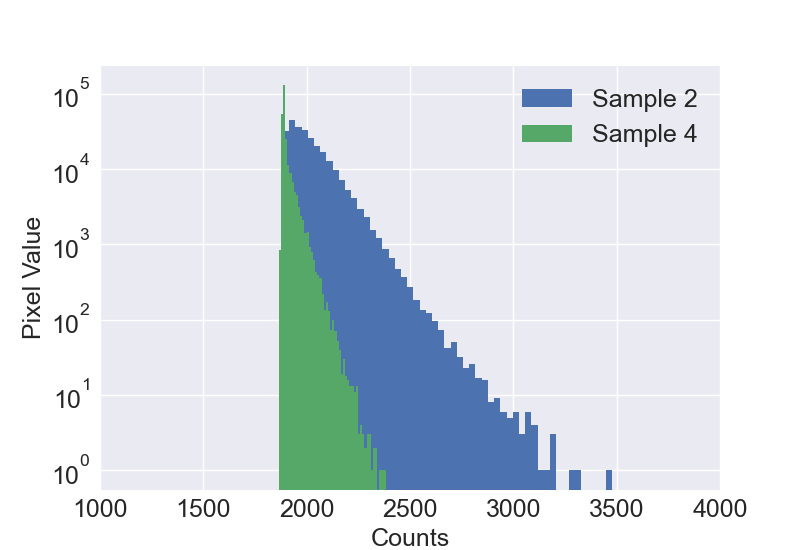

In [8]:
fig, ax = plt.subplots()
ax.hist(x=df.loc[df['sample']==2,'pixel_value'],bins=2000,log=True,label='Sample 2')
ax.hist(x=df.loc[df['sample']==4,'pixel_value'],bins=50,log=True,label='Sample 4')
ax.set_xlim(1000,4000)
ax.set_ylabel('Pixel Value',fontsize=18)
ax.set_xlabel('Counts',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.legend(fontsize=18)
#fig.savefig('796_803_histogram_comparison.png',dpi=500)